<a href="https://colab.research.google.com/github/wildhugecoconut/BMW_firts_model/blob/main/BMW_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Un documento (Word/pdf) de máximo 2 páginas (letra 12) donde se explique:
Qué columnas eliminaron (en caso se haya eliminado)
Qué se hizo con los nulos y cómo se limpiaron las columnas
Comentarios del análisis univariable, están todas ok? Hay alguna con outliers? Hay alguna por agrupar?
Análisis de Correlación inicial, hay alguna variable correlacionada?
Análisis variable vs target, hay algún insight interesante?
Transformación de categóricas a numéricas, que variables van a transformar? que técnica se va usar?
Análisis de correlación final, hay alguna variable correlacionada?
Y finalmente deben poner la lista de columnas completa que tendría su dataset limpio y preprocesado (además del tipo de dato de cada columna) y un pantallazo de las 5 primeras líneas
Se puede agregar pantallazos de algunos outputs, pero ojo que todo debe entrar en 2 páginas
Programa: en este programa debe estar todo el proceso de limpieza y preprocesamiento del dataset, tanto código, comentarios como también el output de cada paso
Criterios de evaluación:
Documento con todo lo mencionado arriba (60%)
Programa (40%)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/clase jose/t max/bmw_pricing_v3.csv")

In [ ]:
df

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


In [ ]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
df_bmw.isnull()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False
1,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False
4,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False
4839,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
4840,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4841,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [ ]:
df_bmw["marca"].value_counts()

BMW    3873
Name: marca, dtype: int64

In [ ]:
df_bmw[df_bmw.duplicated()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [ ]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
df_bmw2=df_bmw.copy()

In [ ]:
len(df_bmw2[df_bmw2["modelo"].duplicated()])

4766

In [ ]:
unique_models = df_bmw2["modelo"].unique()

for model in unique_models:
    print(model)

118
M4
320
420
425
335
325
Z4
120
220
650
135
218
318
430
M3
330
225
M235
316
435
640
640 Gran Coupé
435 Gran Coupé
i8
630
430 Gran Coupé
635
520
nan
525
530
535
320 Gran Turismo
518
116
328
523
X3
M550
528
325 Gran Turismo
125
318 Gran Turismo
420 Gran Coupé
i3
114
520 Gran Turismo
530 Gran Turismo
M135
418 Gran Coupé
330 Gran Turismo
335 Gran Turismo
730
123
535 Gran Turismo
740
750
ActiveHybrid 5
735
M5
X5
X1
X4
X6
X6 M
X5 M
X5 M50
218 Active Tourer
218 Gran Tourer
216
220 Active Tourer
216 Gran Tourer
216 Active Tourer
 Active Tourer
225 Active Tourer
214 Gran Tourer


In [ ]:
del(df_bmw2["marca"])

In [ ]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4840 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4842 non-null   float64
 3   fecha_registro               2420 non-null   object 
 4   tipo_gasolina                4838 non-null   object 
 5   color                        4398 non-null   object 
 6   tipo_coche                   3383 non-null   object 
 7   volante_regulable            4839 non-null   object 
 8   aire_acondicionado           4357 non-null   object 
 9   camara_trasera               4841 non-null   object 
 10  asientos_traseros_plegables  1452 non-null   object 
 11  elevalunas_electrico         4841 non-null   object 
 12  bluetooth                    4115 non-null   object 
 13  gps               

In [ ]:
df_bmw2["modelo"].mode()

0    320
Name: modelo, dtype: object

In [ ]:
df_bmw2.isnull().sum()

modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [ ]:
df_bmw2[df_bmw2["modelo"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,NaN,diesel,black,NaN,False,True,False,NaN,False,NaN,True,NaN,13300.0,2018-08-01
4766,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,NaN,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,NaN,diesel,white,NaN,False,False,False,NaN,False,False,False,False,800.0,2018-03-01


In [ ]:
df_bmw2.iloc[173]

modelo                                NaN
km                               146338.0
potencia                            105.0
fecha_registro                        NaN
tipo_gasolina                      diesel
color                               black
tipo_coche                            NaN
volante_regulable                   False
aire_acondicionado                   True
camara_trasera                      False
asientos_traseros_plegables           NaN
elevalunas_electrico                False
bluetooth                             NaN
gps                                  True
alerta_lim_velocidad                  NaN
precio                            13300.0
fecha_venta                    2018-08-01
Name: 173, dtype: object

In [ ]:
df_bmw2["modelo"].fillna("320", inplace=True)

In [ ]:
df_bmw2.dropna(subset=["km"], inplace=True)

In [ ]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4841 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4841 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4840 non-null   float64
 3   fecha_registro               2419 non-null   object 
 4   tipo_gasolina                4836 non-null   object 
 5   color                        4396 non-null   object 
 6   tipo_coche                   3382 non-null   object 
 7   volante_regulable            4837 non-null   object 
 8   aire_acondicionado           4355 non-null   object 
 9   camara_trasera               4839 non-null   object 
 10  asientos_traseros_plegables  1450 non-null   object 
 11  elevalunas_electrico         4839 non-null   object 
 12  bluetooth                    4113 non-null   object 
 13  gps               

In [ ]:
df_bmw2.reset_index(drop=True,inplace=True)

In [ ]:
df_bmw2.head(30)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
6,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
7,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,NaN,False,True,True,False,6100.0,2018-02-01
8,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
9,320,139541.0,135.0,NaN,diesel,white,convertible,False,False,False,NaN,True,False,True,False,17300.0,2018-03-01


In [ ]:
df_bmw3=df_bmw2.copy()
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4841 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4840 non-null   float64
 3   fecha_registro               2419 non-null   object 
 4   tipo_gasolina                4836 non-null   object 
 5   color                        4396 non-null   object 
 6   tipo_coche                   3382 non-null   object 
 7   volante_regulable            4837 non-null   object 
 8   aire_acondicionado           4355 non-null   object 
 9   camara_trasera               4839 non-null   object 
 10  asientos_traseros_plegables  1450 non-null   object 
 11  elevalunas_electrico         4839 non-null   object 
 12  bluetooth                    4113 non-null   object 
 13  gps               

<Axes: >

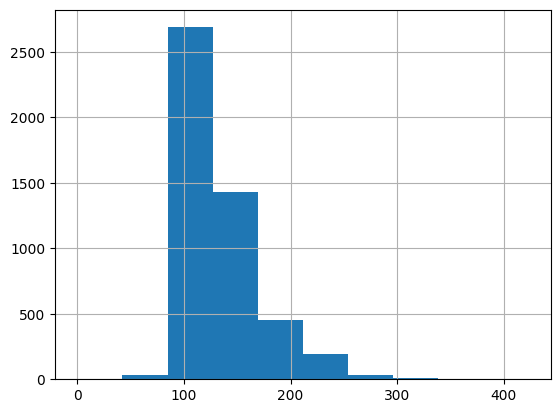

In [ ]:
df_bmw3["potencia"].hist()

In [ ]:
media_pot=df_bmw3["potencia"].mean()

In [ ]:
df_bmw3[df_bmw3["potencia"]==0]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3764,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,NaN,11700.0,2018-03-01


In [ ]:
tt=df_bmw[df_bmw["modelo"]=="X1"]

In [ ]:
tt["potencia"].value_counts()

105.0    91
100.0    54
85.0     36
135.0    33
120.0    31
130.0    13
160.0     9
150.0     3
110.0     2
0.0       1
137.0     1
Name: potencia, dtype: int64

In [ ]:
tt["potencia"]==85

3743    False
3744    False
3746    False
3747    False
3748    False
        ...  
4775    False
4778    False
4780    False
4784     True
4814    False
Name: potencia, Length: 274, dtype: bool

In [ ]:
for i in tt :
  print()



In [ ]:
df_bmw["modelo"].value_counts()

320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64

In [ ]:
filtro = (df_bmw2["potencia"] >=0) & (df_bmw2["potencia"] <=100)
valores_total = df_bmw2.loc[filtro,"potencia"]
conteo_valores = valores_total.value_counts()
print(conteo_valores)

85.0     631
100.0    570
90.0      40
70.0      11
75.0       9
87.0       6
80.0       4
95.0       3
77.0       3
25.0       2
66.0       2
0.0        1
Name: potencia, dtype: int64


In [ ]:
filtro = (df_bmw2["potencia"] >=250) & (df_bmw2["potencia"] <=423)
valores_total = df_bmw2.loc[filtro,"potencia"]
conteo_valores_max = valores_total.value_counts()
print(conteo_valores_max)

280.0    32
317.0     4
309.0     4
270.0     2
250.0     1
412.0     1
423.0     1
300.0     1
261.0     1
Name: potencia, dtype: int64


In [ ]:
media_real=df_bmw3[(df_bmw2["potencia"] >=85) & (df_bmw3["potencia"] <=280)]

In [ ]:
media_final=media_real["potencia"].mean()

In [ ]:
media_real

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4837,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4838,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4839,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


In [ ]:
df_bmw3["potencia"].fillna(media_final,inplace=True)

In [ ]:
df_bmw3.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2422
tipo_gasolina                     5
color                           445
tipo_coche                     1459
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [ ]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_CopyMode',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 

In [ ]:
df_bmw4=df_bmw3.copy()

In [ ]:
df_bmw4["potencia"].replace(0, media_final, inplace=True)

In [ ]:
df_bmw4.sort_values(by="potencia")

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1795,i3,152328.0,25.0,NaN,hybrid_petrol,black,NaN,False,True,False,NaN,False,False,True,NaN,20300.0,2018-04-01
1924,i3,152470.0,25.0,NaN,hybrid_petrol,black,hatchback,False,True,False,NaN,False,False,True,True,15500.0,2018-03-01
2389,318,170529.0,66.0,NaN,diesel,silver,hatchback,False,False,True,NaN,False,False,False,False,1000.0,2018-08-01
2770,316,146951.0,66.0,1990-03-01,petrol,white,sedan,False,False,False,NaN,False,False,False,False,1300.0,2018-04-01
3704,114,25703.0,70.0,2016-01-01,diesel,grey,subcompact,False,True,False,NaN,False,False,True,False,8200.0,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,M3,33670.0,317.0,2014-03-01,petrol,blue,sedan,True,True,False,NaN,False,True,True,True,51200.0,2018-04-01
72,M4,69410.0,317.0,2015-02-01,petrol,white,NaN,True,True,False,NaN,False,True,True,True,53600.0,2018-03-01
3091,M3,39250.0,317.0,2015-11-01,petrol,black,sedan,True,True,False,NaN,False,True,True,True,52400.0,2018-05-01
3600,M5,150187.0,412.0,NaN,petrol,white,sedan,True,True,True,NaN,True,True,True,True,41600.0,2018-09-01


In [ ]:
df_bmw4.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2422
tipo_gasolina                     5
color                           445
tipo_coche                     1459
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [ ]:
df_bmw4["tipo_gasolina"].value_counts()

diesel           4629
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [ ]:
df_bmw4["tipo_gasolina"].fillna("diesel",inplace=True)

In [ ]:
df_bmw4["tipo_gasolina"].replace("Diesel","diesel", inplace=True)

In [ ]:
df_bmw4["volante_regulable"].value_counts()

True     2660
False    2177
Name: volante_regulable, dtype: int64

In [ ]:
df_bmw4.dropna(subset=["volante_regulable"], inplace=True)

In [ ]:
df_bmw4.reset_index(drop=True,inplace=True)

In [ ]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
df_bmw4["camara_trasera"].value_counts()

False    3860
True      975
Name: camara_trasera, dtype: int64

In [ ]:
df_bmw4["camara_trasera"].fillna(False,inplace=True)

In [ ]:
df_bmw4["elevalunas_electrico"].value_counts()

False    2610
True     2225
Name: elevalunas_electrico, dtype: int64

In [ ]:
df_bmw4["elevalunas_electrico"].fillna(False,inplace=True)

In [ ]:
df_bmw4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4837 entries, 0 to 4836
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4837 non-null   object 
 1   km                           4837 non-null   float64
 2   potencia                     4837 non-null   float64
 3   fecha_registro               2416 non-null   object 
 4   tipo_gasolina                4837 non-null   object 
 5   color                        4392 non-null   object 
 6   tipo_coche                   3381 non-null   object 
 7   volante_regulable            4837 non-null   object 
 8   aire_acondicionado           4353 non-null   object 
 9   camara_trasera               4837 non-null   bool   
 10  asientos_traseros_plegables  1448 non-null   object 
 11  elevalunas_electrico         4837 non-null   bool   
 12  bluetooth                    4109 non-null   object 
 13  gps               

In [ ]:
df_bmw4.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2421
tipo_gasolina                     0
color                           445
tipo_coche                     1456
volante_regulable                 0
aire_acondicionado              484
camara_trasera                    0
asientos_traseros_plegables    3389
elevalunas_electrico              0
bluetooth                       728
gps                               0
alerta_lim_velocidad            727
precio                            6
fecha_venta                       1
dtype: int64

In [ ]:
df_bmw4.dropna(subset="fecha_venta",inplace=True)

In [ ]:
df_bmw4.reset_index(drop=True,inplace=True)

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

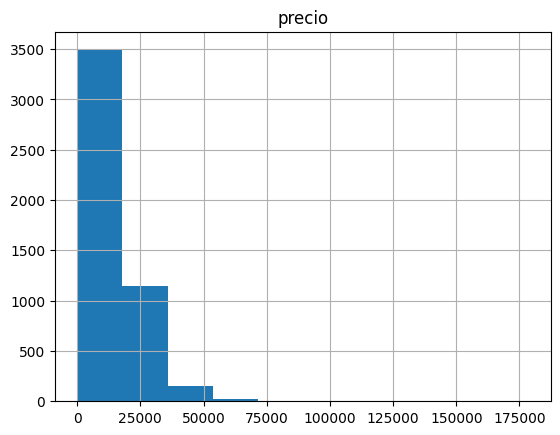

In [ ]:
df_bmw4.hist("precio")

In [ ]:
media_precio=df_bmw4["precio"].mean()

In [ ]:
df_bmw4["precio"].fillna(media_precio,inplace=True)

In [ ]:
df_bmw4

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4832,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4833,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4834,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


In [ ]:
df_bmw5=df_bmw4.copy()

In [ ]:
df_bmw5["color"].isnull().sum()

445

In [ ]:
df_bmw4["color"].value_counts()

black     1495
grey      1069
blue       646
white      484
brown      302
silver     291
red         47
beige       37
green       14
orange       6
Name: color, dtype: int64

In [ ]:
df_bmw5["color"].value_counts()

black     1495
grey      1069
blue       646
white      484
brown      302
silver     291
red         47
beige       37
green       14
orange       6
Name: color, dtype: int64

In [ ]:
df_bmw5["color"].isnull().sum()

445

In [ ]:
'''
# Obtener el recuento de colores existentes
df_color_counts = df_bmw5["color"].value_counts()

# Calcular la proporción de cada color en relación con el total de colores no nulos
total_non_null = df_color_counts.sum()
proportions = df_color_counts / total_non_null

# Calcular el número de nulos que se asignará a cada color
total_nulls = df_bmw5["color"].isnull().sum()
nulls_per_color = np.round(proportions * total_nulls).astype(int)

# Distribuir los nulos proporcionalmente en los colores existentes
null_indices = df_bmw5[df_bmw5["color"].isnull()].index
colors = nulls_per_color.index.to_list()
weights = nulls_per_color.values / nulls_per_color.sum()
replacement_colors = np.random.choice(colors, size=len(null_indices), p=weights)
df_bmw5.loc[null_indices, "color"] = replacement_colors
'''

'\n# Obtener el recuento de colores existentes\ndf_color_counts = df_bmw5["color"].value_counts()\n\n# Calcular la proporción de cada color en relación con el total de colores no nulos\ntotal_non_null = df_color_counts.sum()\nproportions = df_color_counts / total_non_null\n\n# Calcular el número de nulos que se asignará a cada color\ntotal_nulls = df_bmw5["color"].isnull().sum()\nnulls_per_color = np.round(proportions * total_nulls).astype(int)\n\n# Distribuir los nulos proporcionalmente en los colores existentes\nnull_indices = df_bmw5[df_bmw5["color"].isnull()].index\ncolors = nulls_per_color.index.to_list()\nweights = nulls_per_color.values / nulls_per_color.sum()\nreplacement_colors = np.random.choice(colors, size=len(null_indices), p=weights)\ndf_bmw5.loc[null_indices, "color"] = replacement_colors\n'

In [ ]:
# Obtener el recuento de colores existentes
df_color_counts = df_bmw5["color"].value_counts()

# Calcular la proporción de cada color en relación con el total de colores no nulos
total_non_null = df_color_counts.sum()
proportions = df_color_counts / total_non_null

# Calcular el número de nulos que se asignará a cada color
total_nulls = df_bmw5["color"].isnull().sum()

# Manejar el caso cuando no hay valores nulos
if total_nulls == 0:
    print("No hay valores nulos en la columna 'color'.")
else:
    nulls_per_color = np.round(proportions * total_nulls).astype(int)

    # Distribuir los nulos proporcionalmente en los colores existentes
    null_indices = df_bmw5[df_bmw5["color"].isnull()].index
    colors = nulls_per_color.index.to_list()
    weights = nulls_per_color.values / nulls_per_color.sum()
    replacement_colors = np.random.choice(colors, size=len(null_indices), p=weights)
    df_bmw5.loc[null_indices, "color"] = replacement_colors


In [ ]:
df_bmw4["color"].value_counts()

black     1495
grey      1069
blue       646
white      484
brown      302
silver     291
red         47
beige       37
green       14
orange       6
Name: color, dtype: int64

In [ ]:
df_bmw5["color"].value_counts()

black     1644
grey      1169
blue       697
white      541
brown      335
silver     330
red         53
beige       41
green       16
orange      10
Name: color, dtype: int64

In [ ]:
df_bmw5["tipo_coche"].fillna("sin_tipo_coche", inplace=True)

In [ ]:
df_bmw4["aire_acondicionado"].value_counts()

True     3462
False     890
Name: aire_acondicionado, dtype: int64

In [ ]:
df_bmw4["aire_acondicionado"].value_counts()

True     3462
False     890
Name: aire_acondicionado, dtype: int64

In [ ]:
df_bmw5["aire_acondicionado"].value_counts()

True     3462
False     890
Name: aire_acondicionado, dtype: int64

In [ ]:
conteo_valores1 = df_bmw5["aire_acondicionado"].value_counts()
total_registros1 = len(df_bmw5)
probabilidad_valores1 = conteo_valores1 / total_registros1

# Calcula las proporciones originales de True y False
prop_true = probabilidad_valores1.loc[True]
prop_false = probabilidad_valores1.loc[False]

# Calcula las cantidades para llenar los valores nulos proporcionalmente
cantidad_nulos = df_bmw5["aire_acondicionado"].isnull().sum()
cant_true_fill = int(cantidad_nulos * prop_true)
cant_false_fill = cantidad_nulos - cant_true_fill

# Llena los valores nulos proporcionalmente
df_bmw5.loc[df_bmw5["aire_acondicionado"].isnull(), "aire_acondicionado"] = [True] * cant_true_fill + [False] * cant_false_fill


In [ ]:
df_bmw5.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2420
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado                0
camara_trasera                    0
asientos_traseros_plegables    3388
elevalunas_electrico              0
bluetooth                       728
gps                               0
alerta_lim_velocidad            727
precio                            0
fecha_venta                       0
dtype: int64

In [ ]:
del(df_bmw5["asientos_traseros_plegables"])

In [ ]:
df_bmw5["bluetooth"].value_counts()

False    3114
True      994
Name: bluetooth, dtype: int64

In [ ]:
conteo_valores11 = df_bmw5["bluetooth"].value_counts()
total_registros11 = len(df_bmw5)
probabilidad_valores11 = conteo_valores11 / total_registros11

# Calcula las proporciones originales de True y False
prop_true11 = probabilidad_valores11.loc[True]
prop_false11 = probabilidad_valores11.loc[False]

# Calcula las cantidades para llenar los valores nulos proporcionalmente
cantidad_nulos11 = df_bmw5["bluetooth"].isnull().sum()
cant_true_fill11 = int(cantidad_nulos11 * prop_true11)
cant_false_fill11 = cantidad_nulos11 - cant_true_fill11

# Llena los valores nulos proporcionalmente
df_bmw5.loc[df_bmw5["bluetooth"].isnull(), "bluetooth"] = [True] * cant_true_fill11 + [False] * cant_false_fill11


In [ ]:
df_bmw5["alerta_lim_velocidad"].value_counts()

True     2236
False    1873
Name: alerta_lim_velocidad, dtype: int64

In [ ]:
conteo_valores11 = df_bmw5["alerta_lim_velocidad"].value_counts()
total_registros11 = len(df_bmw5)
probabilidad_valores11 = conteo_valores11 / total_registros11

# Calcula las proporciones originales de True y False
prop_true11 = probabilidad_valores11.loc[True]
prop_false11 = probabilidad_valores11.loc[False]

# Calcula las cantidades para llenar los valores nulos proporcionalmente
cantidad_nulos11 = df_bmw5["alerta_lim_velocidad"].isnull().sum()
cant_true_fill11 = int(cantidad_nulos11 * prop_true11)
cant_false_fill11 = cantidad_nulos11 - cant_true_fill11

# Llena los valores nulos proporcionalmente
df_bmw5.loc[df_bmw5["alerta_lim_velocidad"].isnull(), "alerta_lim_velocidad"] = [True] * cant_true_fill11 + [False] * cant_false_fill11

In [ ]:
df_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [ ]:
df_bmw6=df_bmw5.copy()

In [ ]:
df_bmw6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4836 non-null   object 
 1   km                    4836 non-null   float64
 2   potencia              4836 non-null   float64
 3   fecha_registro        2416 non-null   object 
 4   tipo_gasolina         4836 non-null   object 
 5   color                 4836 non-null   object 
 6   tipo_coche            4836 non-null   object 
 7   volante_regulable     4836 non-null   object 
 8   aire_acondicionado    4836 non-null   object 
 9   camara_trasera        4836 non-null   bool   
 10  elevalunas_electrico  4836 non-null   bool   
 11  bluetooth             4836 non-null   object 
 12  gps                   4836 non-null   bool   
 13  alerta_lim_velocidad  4836 non-null   object 
 14  precio                4836 non-null   float64
 15  fecha_venta          

In [ ]:
df_bmw6

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,sin_tipo_coche,True,True,False,True,True,True,True,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,sin_tipo_coche,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,sin_tipo_coche,True,True,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,sin_tipo_coche,False,True,False,False,False,True,False,14600.0,2018-08-01
4832,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,sin_tipo_coche,False,True,False,False,False,True,True,17500.0,2018-08-01
4833,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01
4834,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01


In [ ]:
df_bmw6["fecha_registro"]=pd.to_datetime(df_bmw6["fecha_registro"])

In [ ]:
df_bmw6["fecha_venta"]=pd.to_datetime(df_bmw6["fecha_venta"])

In [ ]:
df_bmw6["tiempo_para_venta"]=df_bmw6["fecha_venta"]-df_bmw6["fecha_registro"]

In [ ]:
df_bmw7=df_bmw6.copy()

In [ ]:
df_bmw7.isnull().sum()

modelo                     0
km                         0
potencia                   0
fecha_registro          2420
tipo_gasolina              0
color                      0
tipo_coche                 0
volante_regulable          0
aire_acondicionado         0
camara_trasera             0
elevalunas_electrico       0
bluetooth                  0
gps                        0
alerta_lim_velocidad       0
precio                     0
fecha_venta                0
tiempo_para_venta       2420
dtype: int64

In [ ]:
del(df_bmw7["fecha_venta"])
del(df_bmw7["fecha_registro"])

In [ ]:
df_bmw7 = df_bmw7.drop(2938)

In [ ]:
df_bmw7.reset_index(drop=True,inplace=True)

In [ ]:
df_bmw7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   modelo                4835 non-null   object         
 1   km                    4835 non-null   float64        
 2   potencia              4835 non-null   float64        
 3   tipo_gasolina         4835 non-null   object         
 4   color                 4835 non-null   object         
 5   tipo_coche            4835 non-null   object         
 6   volante_regulable     4835 non-null   object         
 7   aire_acondicionado    4835 non-null   object         
 8   camara_trasera        4835 non-null   bool           
 9   elevalunas_electrico  4835 non-null   bool           
 10  bluetooth             4835 non-null   object         
 11  gps                   4835 non-null   bool           
 12  alerta_lim_velocidad  4835 non-null   object         
 13  pre

In [ ]:
corr = df_bmw7.corr(numeric_only=True)

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,camara_trasera,elevalunas_electrico,gps,precio
km,1.000000,-0.048929,0.002525,0.047702,0.154856,-0.408931
potencia,-0.048929,1.000000,0.314018,0.341584,0.006063,0.638307
camara_trasera,0.002525,0.314018,1.000000,0.198419,0.061998,0.252447
elevalunas_electrico,0.047702,0.341584,0.198419,1.000000,0.203347,0.261385
gps,0.154856,0.006063,0.061998,0.203347,1.000000,-0.005283
precio,-0.408931,0.638307,0.252447,0.261385,-0.005283,1.000000


In [ ]:
df_bmw7["km"].min()

-64.0

In [ ]:
df_bmw7.sort_values(by="km")

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_para_venta
2932,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,True,False,False,False,True,True,75000.0,NaT
2403,420 Gran Coupé,476.0,120.0,diesel,blue,hatchback,True,True,False,False,True,True,True,30300.0,NaT
4365,X5,612.0,183.0,diesel,black,suv,True,True,False,False,False,True,True,49100.0,608 days
3928,X5,706.0,155.0,diesel,black,suv,True,True,False,True,True,True,False,41600.0,215 days
3680,116,2399.0,85.0,diesel,white,subcompact,False,False,False,False,False,True,False,17300.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,320,405816.0,100.0,diesel,blue,sedan,False,False,False,False,False,True,False,500.0,6664 days
2823,525,439060.0,105.0,diesel,silver,sin_tipo_coche,False,False,True,False,False,True,False,100.0,NaT
2344,318,477571.0,85.0,diesel,grey,sin_tipo_coche,False,True,False,False,True,False,False,1200.0,NaT
553,520,484615.0,120.0,diesel,blue,estate,True,True,False,False,True,True,False,8300.0,2585 days


In [ ]:
df_bmw6["precio"].max()

178500.0

In [ ]:
df_bmw8=df_bmw7.copy()

In [ ]:
df_bmw8['time_sell'] = df_bmw8['tiempo_para_venta'].dt.total_seconds()

In [ ]:
corr = df_bmw8.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,camara_trasera,elevalunas_electrico,gps,precio,time_sell
km,1.000000,-0.048929,0.002525,0.047702,0.154856,-0.408931,0.474998
potencia,-0.048929,1.000000,0.314018,0.341584,0.006063,0.638307,-0.095711
camara_trasera,0.002525,0.314018,1.000000,0.198419,0.061998,0.252447,0.025022
elevalunas_electrico,0.047702,0.341584,0.198419,1.000000,0.203347,0.261385,-0.095354
gps,0.154856,0.006063,0.061998,0.203347,1.000000,-0.005283,0.082335
precio,-0.408931,0.638307,0.252447,0.261385,-0.005283,1.000000,-0.419188
time_sell,0.474998,-0.095711,0.025022,-0.095354,0.082335,-0.419188,1.000000


In [ ]:
del(df_bmw8["tiempo_para_venta"])

In [ ]:
df_bmw9=df_bmw8.copy()

In [ ]:
df_bmw8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4835 non-null   object 
 1   km                    4835 non-null   float64
 2   potencia              4835 non-null   float64
 3   tipo_gasolina         4835 non-null   object 
 4   color                 4835 non-null   object 
 5   tipo_coche            4835 non-null   object 
 6   volante_regulable     4835 non-null   object 
 7   aire_acondicionado    4835 non-null   object 
 8   camara_trasera        4835 non-null   bool   
 9   elevalunas_electrico  4835 non-null   bool   
 10  bluetooth             4835 non-null   object 
 11  gps                   4835 non-null   bool   
 12  alerta_lim_velocidad  4835 non-null   object 
 13  precio                4835 non-null   float64
 14  time_sell             2415 non-null   float64
dtypes: bool(3), float64(4

In [ ]:
df_bmw9["volante_regulable"].value_counts()

True     2658
False    2177
Name: volante_regulable, dtype: int64

In [ ]:
df_bmw8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4835 non-null   object 
 1   km                    4835 non-null   float64
 2   potencia              4835 non-null   float64
 3   tipo_gasolina         4835 non-null   object 
 4   color                 4835 non-null   object 
 5   tipo_coche            4835 non-null   object 
 6   volante_regulable     4835 non-null   object 
 7   aire_acondicionado    4835 non-null   object 
 8   camara_trasera        4835 non-null   bool   
 9   elevalunas_electrico  4835 non-null   bool   
 10  bluetooth             4835 non-null   object 
 11  gps                   4835 non-null   bool   
 12  alerta_lim_velocidad  4835 non-null   object 
 13  precio                4835 non-null   float64
 14  time_sell             2415 non-null   float64
dtypes: bool(3), float64(4

In [ ]:
'''
df_bmw9["GPS_BOOL"]=df_bmw9["gps"].astype(int)
df_bmw9["elevalunas_electrico_BOOL"]=df_bmw9["elevalunas_electrico"].astype(int)
df_bmw9["camara_trasera _BOOL"]=df_bmw9["camara_trasera"].astype(int)
'''


'\ndf_bmw9["GPS_BOOL"]=df_bmw9["gps"].astype(int)\ndf_bmw9["elevalunas_electrico_BOOL"]=df_bmw9["elevalunas_electrico"].astype(int)\ndf_bmw9["camara_trasera _BOOL"]=df_bmw9["camara_trasera"].astype(int)\n'

In [ ]:
#columns_to_delete=df_bmw9[["gps",'elevalunas_electrico',"camara_trasera"]]

In [ ]:
'''
for column in columns_to_delete:
    if column in df_bmw9:
        df_bmw9 = df_bmw9.drop(column, axis=1)
'''

'\nfor column in columns_to_delete:\n    if column in df_bmw9:\n        df_bmw9 = df_bmw9.drop(column, axis=1)\n'

In [ ]:
'''
target= ["precio"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas
    '''

'\ntarget= ["precio"]\ndef obtener_lista_variables(dataset):\n    lista_numericas=[]\n    lista_boolean=[]\n    lista_categoricas=[]\n    for i in dataset:\n        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:\n              lista_numericas.append(i)\n        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:\n              lista_boolean.append(i)\n        elif  (dataset[i].dtype.kind=="O")  and i not in target:\n              lista_categoricas.append(i)\n\n    return lista_numericas, lista_boolean, lista_categoricas\n    '

In [ ]:
target= ["precio"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="b")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
l_num,l_bool,l_cat=obtener_lista_variables(df_bmw9)

In [ ]:
for i in l_bool:
  if i in df_bmw9:
    df_bmw9[i+"_bool"]=df_bmw9[i].astype(int)

In [ ]:
for column in l_bool:
    if column in df_bmw9:
        df_bmw9 = df_bmw9.drop(column, axis=1)

In [ ]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   modelo                     4835 non-null   object 
 1   km                         4835 non-null   float64
 2   potencia                   4835 non-null   float64
 3   tipo_gasolina              4835 non-null   object 
 4   color                      4835 non-null   object 
 5   tipo_coche                 4835 non-null   object 
 6   volante_regulable          4835 non-null   object 
 7   aire_acondicionado         4835 non-null   object 
 8   bluetooth                  4835 non-null   object 
 9   alerta_lim_velocidad       4835 non-null   object 
 10  precio                     4835 non-null   float64
 11  time_sell                  2415 non-null   float64
 12  camara_trasera_bool        4835 non-null   int64  
 13  elevalunas_electrico_bool  4835 non-null   int64

In [ ]:
l_bool

['camara_trasera', 'elevalunas_electrico', 'gps']

In [ ]:
l_cat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'bluetooth',
 'alerta_lim_velocidad']

In [ ]:
l_num

['km', 'potencia', 'time_sell']

In [ ]:
df_bmw8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4835 non-null   object 
 1   km                    4835 non-null   float64
 2   potencia              4835 non-null   float64
 3   tipo_gasolina         4835 non-null   object 
 4   color                 4835 non-null   object 
 5   tipo_coche            4835 non-null   object 
 6   volante_regulable     4835 non-null   object 
 7   aire_acondicionado    4835 non-null   object 
 8   camara_trasera        4835 non-null   bool   
 9   elevalunas_electrico  4835 non-null   bool   
 10  bluetooth             4835 non-null   object 
 11  gps                   4835 non-null   bool   
 12  alerta_lim_velocidad  4835 non-null   object 
 13  precio                4835 non-null   float64
 14  time_sell             2415 non-null   float64
dtypes: bool(3), float64(4

In [ ]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   modelo                     4835 non-null   object 
 1   km                         4835 non-null   float64
 2   potencia                   4835 non-null   float64
 3   tipo_gasolina              4835 non-null   object 
 4   color                      4835 non-null   object 
 5   tipo_coche                 4835 non-null   object 
 6   volante_regulable          4835 non-null   object 
 7   aire_acondicionado         4835 non-null   object 
 8   bluetooth                  4835 non-null   object 
 9   alerta_lim_velocidad       4835 non-null   object 
 10  precio                     4835 non-null   float64
 11  time_sell                  2415 non-null   float64
 12  camara_trasera_bool        4835 non-null   int64  
 13  elevalunas_electrico_bool  4835 non-null   int64

In [ ]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   modelo                     4835 non-null   object 
 1   km                         4835 non-null   float64
 2   potencia                   4835 non-null   float64
 3   tipo_gasolina              4835 non-null   object 
 4   color                      4835 non-null   object 
 5   tipo_coche                 4835 non-null   object 
 6   volante_regulable          4835 non-null   object 
 7   aire_acondicionado         4835 non-null   object 
 8   bluetooth                  4835 non-null   object 
 9   alerta_lim_velocidad       4835 non-null   object 
 10  precio                     4835 non-null   float64
 11  time_sell                  2415 non-null   float64
 12  camara_trasera_bool        4835 non-null   int64  
 13  elevalunas_electrico_bool  4835 non-null   int64

In [ ]:
l_cat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'bluetooth',
 'alerta_lim_velocidad']

In [ ]:
l_num

['km', 'potencia', 'time_sell']

In [ ]:
l_bool

['camara_trasera', 'elevalunas_electrico', 'gps']

In [ ]:
corr = df_bmw9.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,precio,time_sell,camara_trasera_bool,elevalunas_electrico_bool,gps_bool
km,1.000000,-0.048929,-0.408931,0.474998,0.002525,0.047702,0.154856
potencia,-0.048929,1.000000,0.638307,-0.095711,0.314018,0.341584,0.006063
precio,-0.408931,0.638307,1.000000,-0.419188,0.252447,0.261385,-0.005283
time_sell,0.474998,-0.095711,-0.419188,1.000000,0.025022,-0.095354,0.082335
camara_trasera_bool,0.002525,0.314018,0.252447,0.025022,1.000000,0.198419,0.061998
elevalunas_electrico_bool,0.047702,0.341584,0.261385,-0.095354,0.198419,1.000000,0.203347
gps_bool,0.154856,0.006063,-0.005283,0.082335,0.061998,0.203347,1.000000


In [ ]:
df_bmw9["LOG_PRECIO"]=np.log10(df_bmw9["precio"])

In [ ]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   modelo                     4835 non-null   object 
 1   km                         4835 non-null   float64
 2   potencia                   4835 non-null   float64
 3   tipo_gasolina              4835 non-null   object 
 4   color                      4835 non-null   object 
 5   tipo_coche                 4835 non-null   object 
 6   volante_regulable          4835 non-null   object 
 7   aire_acondicionado         4835 non-null   object 
 8   bluetooth                  4835 non-null   object 
 9   alerta_lim_velocidad       4835 non-null   object 
 10  precio                     4835 non-null   float64
 11  time_sell                  2415 non-null   float64
 12  camara_trasera_bool        4835 non-null   int64  
 13  elevalunas_electrico_bool  4835 non-null   int64

<Axes: xlabel='gps_bool', ylabel='precio'>

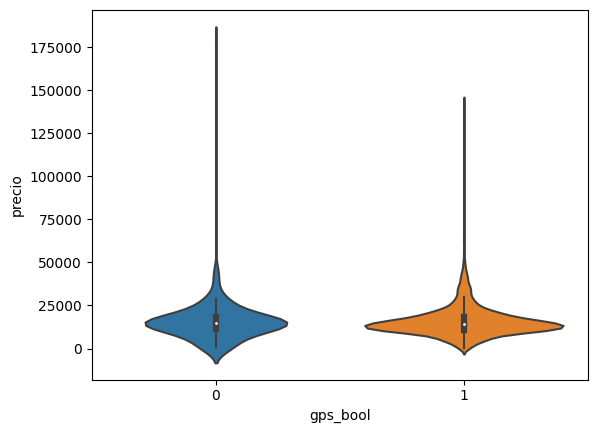

In [ ]:
sns.violinplot(x="gps_bool",y="precio",data=df_bmw9)

In [ ]:
df_bmw9["tipo_gasolina"].value_counts()

diesel           4634
petrol            190
hybrid_petrol       8
electro             3
Name: tipo_gasolina, dtype: int64

In [ ]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   modelo                     4835 non-null   object 
 1   km                         4835 non-null   float64
 2   potencia                   4835 non-null   float64
 3   tipo_gasolina              4835 non-null   object 
 4   color                      4835 non-null   object 
 5   tipo_coche                 4835 non-null   object 
 6   volante_regulable          4835 non-null   object 
 7   aire_acondicionado         4835 non-null   object 
 8   bluetooth                  4835 non-null   object 
 9   alerta_lim_velocidad       4835 non-null   object 
 10  precio                     4835 non-null   float64
 11  time_sell                  2415 non-null   float64
 12  camara_trasera_bool        4835 non-null   int64  
 13  elevalunas_electrico_bool  4835 non-null   int64

In [ ]:
#oe= OrdinalEncoder(categorias)

In [ ]:
l_cat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'bluetooth',
 'alerta_lim_velocidad']

In [ ]:
df_bmw9 = pd.get_dummies(data=df_bmw9, columns=l_cat) #TTTTTTTTTTT

In [ ]:
target = 'precio'
features = df_bmw9.columns[df_bmw9.columns!=target]

In [ ]:
df_bmw9["time_sell"].fillna(-999,inplace=True)

In [ ]:
# Divide dataset en matriz de variables (X) y output (y)
X = df_bmw9[features]
y = df_bmw9[target]

In [ ]:
'''for i in features:
  sns.distplot(X[i])
  plt.title('Distribucion '+i)
  plt.show()
  '''

"for i in features:\n  sns.distplot(X[i])\n  plt.title('Distribucion '+i)\n  plt.show()\n  "

In [ ]:
# Mismo analisis, pero desde una funcion que nos facilita la vida
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(X,y,0.95)
highly_corr

<ipython-input-142-eb730a640991>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]


,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,tipo_gasolina_petrol,tipo_gasolina_diesel,0.9711,0.035715,0.013451,tipo_gasolina_diesel
1,volante_regulable_True,volante_regulable_False,1.0000,0.268496,0.268496,volante_regulable_True
2,aire_acondicionado_True,aire_acondicionado_False,1.0000,0.193434,0.193434,aire_acondicionado_False
3,bluetooth_True,bluetooth_False,1.0000,0.160767,0.160767,bluetooth_False
4,alerta_lim_velocidad_True,alerta_lim_velocidad_False,1.0000,0.345828,0.345828,alerta_lim_velocidad_False


In [ ]:
drop_cols = list(highly_corr['F_to_delete'])
X.drop(columns=drop_cols, inplace=True)
print('Eliminadas columnas altamente correlacionadas:', drop_cols)

Eliminadas columnas altamente correlacionadas: ['tipo_gasolina_diesel', 'volante_regulable_True', 'aire_acondicionado_False', 'bluetooth_False', 'alerta_lim_velocidad_False']


<ipython-input-143-fd1c8ed2fb77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=drop_cols, inplace=True)


In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
vt = VarianceThreshold(threshold = 0.01)
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

69  low variance features were removed:
 ['modelo_ Active Tourer', 'modelo_114', 'modelo_120', 'modelo_123', 'modelo_125', 'modelo_135', 'modelo_214 Gran Tourer', 'modelo_216', 'modelo_216 Active Tourer', 'modelo_216 Gran Tourer', 'modelo_218', 'modelo_218 Active Tourer', 'modelo_218 Gran Tourer', 'modelo_220', 'modelo_220 Active Tourer', 'modelo_225', 'modelo_225 Active Tourer', 'modelo_325', 'modelo_325 Gran Turismo', 'modelo_328', 'modelo_330', 'modelo_330 Gran Turismo', 'modelo_335', 'modelo_335 Gran Turismo', 'modelo_418 Gran Coupé', 'modelo_420', 'modelo_420 Gran Coupé', 'modelo_425', 'modelo_430', 'modelo_430 Gran Coupé', 'modelo_435', 'modelo_435 Gran Coupé', 'modelo_520 Gran Turismo', 'modelo_523', 'modelo_528', 'modelo_530 Gran Turismo', 'modelo_535', 'modelo_535 Gran Turismo', 'modelo_630', 'modelo_635', 'modelo_640', 'modelo_640 Gran Coupé', 'modelo_650', 'modelo_730', 'modelo_735', 'modelo_740', 'modelo_750', 'modelo_ActiveHybrid 5', 'modelo_M135', 'modelo_M235', 'modelo_M

<ipython-input-146-5eb0bdb5188a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=cols_lowvar,inplace=True)


<Axes: >

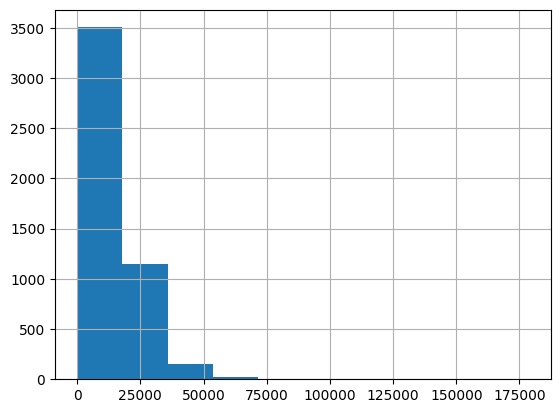

In [ ]:
df_bmw7["precio"].hist()

<Axes: >

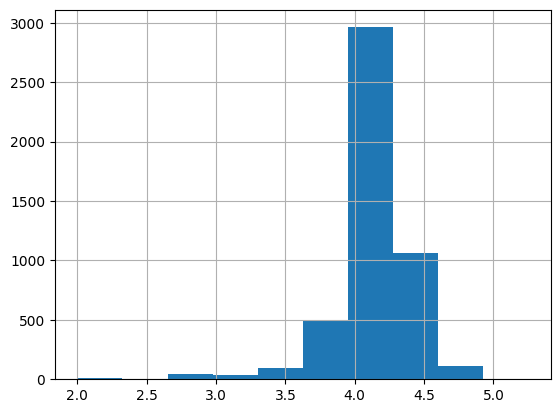

In [ ]:
df_bmw9["LOG_PRECIO"].hist()

<Axes: xlabel='LOG_PRECIO'>

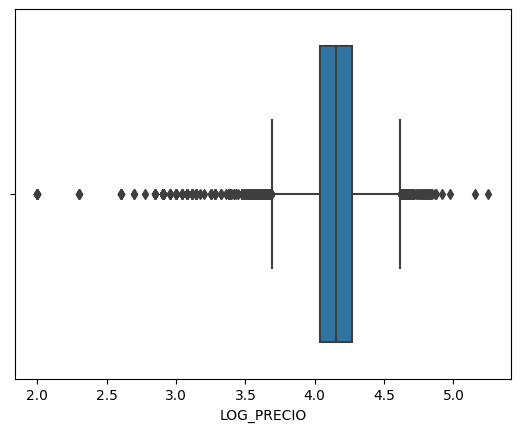

In [ ]:
sns.boxplot(x=df_bmw9["LOG_PRECIO"])

In [ ]:
df_bmw9

,km,potencia,precio,time_sell,camara_trasera_bool,elevalunas_electrico_bool,gps_bool,LOG_PRECIO,modelo_ Active Tourer,modelo_114,...,tipo_coche_suv,tipo_coche_van,volante_regulable_False,volante_regulable_True,aire_acondicionado_False,aire_acondicionado_True,bluetooth_False,bluetooth_True,alerta_lim_velocidad_False,alerta_lim_velocidad_True
0,140411.0,100.0,11300.0,186710400.0,0,1,1,4.053078,0,0,...,0,0,0,1,0,1,0,1,0,1
1,13929.0,317.0,69700.0,-999.0,0,0,1,4.843233,0,0,...,0,0,0,1,0,1,0,1,0,1
2,183297.0,120.0,10200.0,184204800.0,0,1,1,4.008600,0,0,...,0,0,1,0,1,0,1,0,1,0
3,128035.0,135.0,25100.0,-999.0,0,1,1,4.399674,0,0,...,0,0,0,1,0,1,0,1,0,1
4,97097.0,160.0,33400.0,-999.0,0,0,1,4.523746,0,0,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,39743.0,110.0,14600.0,-999.0,0,0,1,4.164353,0,0,...,0,0,1,0,0,1,1,0,1,0
4831,49832.0,100.0,17500.0,99964800.0,0,0,1,4.243038,0,0,...,0,0,1,0,0,1,1,0,0,1
4832,19633.0,110.0,17000.0,92102400.0,0,0,1,4.230449,0,0,...,0,1,1,0,0,1,1,0,0,1
4833,27920.0,110.0,22700.0,76291200.0,0,0,1,4.356026,0,0,...,0,1,0,1,0,1,1,0,0,1


In [ ]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Columns: 115 entries, km to alerta_lim_velocidad_True
dtypes: float64(5), int64(3), uint8(107)
memory usage: 807.5 KB


In [ ]:
df_bmw11=df_bmw9.copy()

In [ ]:
df_bmw11

,km,potencia,precio,time_sell,camara_trasera_bool,elevalunas_electrico_bool,gps_bool,LOG_PRECIO,modelo_ Active Tourer,modelo_114,...,tipo_coche_suv,tipo_coche_van,volante_regulable_False,volante_regulable_True,aire_acondicionado_False,aire_acondicionado_True,bluetooth_False,bluetooth_True,alerta_lim_velocidad_False,alerta_lim_velocidad_True
0,140411.0,100.0,11300.0,186710400.0,0,1,1,4.053078,0,0,...,0,0,0,1,0,1,0,1,0,1
1,13929.0,317.0,69700.0,-999.0,0,0,1,4.843233,0,0,...,0,0,0,1,0,1,0,1,0,1
2,183297.0,120.0,10200.0,184204800.0,0,1,1,4.008600,0,0,...,0,0,1,0,1,0,1,0,1,0
3,128035.0,135.0,25100.0,-999.0,0,1,1,4.399674,0,0,...,0,0,0,1,0,1,0,1,0,1
4,97097.0,160.0,33400.0,-999.0,0,0,1,4.523746,0,0,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,39743.0,110.0,14600.0,-999.0,0,0,1,4.164353,0,0,...,0,0,1,0,0,1,1,0,1,0
4831,49832.0,100.0,17500.0,99964800.0,0,0,1,4.243038,0,0,...,0,0,1,0,0,1,1,0,0,1
4832,19633.0,110.0,17000.0,92102400.0,0,0,1,4.230449,0,0,...,0,1,1,0,0,1,1,0,0,1
4833,27920.0,110.0,22700.0,76291200.0,0,0,1,4.356026,0,0,...,0,1,0,1,0,1,1,0,0,1


In [ ]:
df_bmw11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Columns: 115 entries, km to alerta_lim_velocidad_True
dtypes: float64(5), int64(3), uint8(107)
memory usage: 807.5 KB


In [ ]:
df_bmw11

,km,potencia,precio,time_sell,camara_trasera_bool,elevalunas_electrico_bool,gps_bool,LOG_PRECIO,modelo_ Active Tourer,modelo_114,...,tipo_coche_suv,tipo_coche_van,volante_regulable_False,volante_regulable_True,aire_acondicionado_False,aire_acondicionado_True,bluetooth_False,bluetooth_True,alerta_lim_velocidad_False,alerta_lim_velocidad_True
0,140411.0,100.0,11300.0,186710400.0,0,1,1,4.053078,0,0,...,0,0,0,1,0,1,0,1,0,1
1,13929.0,317.0,69700.0,-999.0,0,0,1,4.843233,0,0,...,0,0,0,1,0,1,0,1,0,1
2,183297.0,120.0,10200.0,184204800.0,0,1,1,4.008600,0,0,...,0,0,1,0,1,0,1,0,1,0
3,128035.0,135.0,25100.0,-999.0,0,1,1,4.399674,0,0,...,0,0,0,1,0,1,0,1,0,1
4,97097.0,160.0,33400.0,-999.0,0,0,1,4.523746,0,0,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,39743.0,110.0,14600.0,-999.0,0,0,1,4.164353,0,0,...,0,0,1,0,0,1,1,0,1,0
4831,49832.0,100.0,17500.0,99964800.0,0,0,1,4.243038,0,0,...,0,0,1,0,0,1,1,0,0,1
4832,19633.0,110.0,17000.0,92102400.0,0,0,1,4.230449,0,0,...,0,1,1,0,0,1,1,0,0,1
4833,27920.0,110.0,22700.0,76291200.0,0,0,1,4.356026,0,0,...,0,1,0,1,0,1,1,0,0,1


In [ ]:
corr = df_bmw11.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
column_names = df_bmw11.columns
column_types = df_bmw11.dtypes

for column in column_names:
    print(f"Columna: {column}, Tipo: {column_types[column]}")

Columna: km, Tipo: float64
Columna: potencia, Tipo: float64
Columna: precio, Tipo: float64
Columna: time_sell, Tipo: float64
Columna: camara_trasera_bool, Tipo: int64
Columna: elevalunas_electrico_bool, Tipo: int64
Columna: gps_bool, Tipo: int64
Columna: LOG_PRECIO, Tipo: float64
Columna: modelo_ Active Tourer, Tipo: uint8
Columna: modelo_114, Tipo: uint8
Columna: modelo_116, Tipo: uint8
Columna: modelo_118, Tipo: uint8
Columna: modelo_120, Tipo: uint8
Columna: modelo_123, Tipo: uint8
Columna: modelo_125, Tipo: uint8
Columna: modelo_135, Tipo: uint8
Columna: modelo_214 Gran Tourer, Tipo: uint8
Columna: modelo_216, Tipo: uint8
Columna: modelo_216 Active Tourer, Tipo: uint8
Columna: modelo_216 Gran Tourer, Tipo: uint8
Columna: modelo_218, Tipo: uint8
Columna: modelo_218 Active Tourer, Tipo: uint8
Columna: modelo_218 Gran Tourer, Tipo: uint8
Columna: modelo_220, Tipo: uint8
Columna: modelo_220 Active Tourer, Tipo: uint8
Columna: modelo_225, Tipo: uint8
Columna: modelo_225 Active Tourer, T

In [ ]:
pd.to_pickle(df_bmw11,"/content/drive/MyDrive/clase jose/pk_df_bmw11_limpio_listo_para_machine_learning")

In [ ]:
df_bmw11=pd.read_pickle("/content/drive/MyDrive/clase jose/pk_df_bmw11_limpio_listo_para_machine_learning")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
print('Train set size:',X_train.shape[0])
print('Test set size:',X_test.shape[0])

Train set size: 4109
Test set size: 726


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
'''
model = LinearRegression()
np.mean(-cross_val_score(model, X_train, y_train, cv=4, scoring='neg_root_mean_squared_error'))
''' # esto es sin estandarizar

"\nmodel = LinearRegression()\nnp.mean(-cross_val_score(model, X_train, y_train, cv=4, scoring='neg_root_mean_squared_error'))\n"

In [ ]:
'''
# Estandarización: fit_transform() en train, transform() en test
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns, index= X_train.index)
X_test_std = pd.DataFrame(X_test_std, columns = X_test.columns, index= X_test.index)
'''

'\n# Estandarización: fit_transform() en train, transform() en test\nscaler = StandardScaler()\n\nX_train_std = scaler.fit_transform(X_train)\nX_test_std = scaler.transform(X_test)\n\nX_train_std = pd.DataFrame(X_train_std, columns = X_train.columns, index= X_train.index)\nX_test_std = pd.DataFrame(X_test_std, columns = X_test.columns, index= X_test.index)\n'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
'''
X_train = X_train.dropna()
y_train = y_train[X_train.index]
'''

'\nX_train = X_train.dropna()\ny_train = y_train[X_train.index]\n'

In [ ]:
print(X_train.isnull().sum())


km                           0
potencia                     0
time_sell                    0
camara_trasera_bool          0
elevalunas_electrico_bool    0
gps_bool                     0
LOG_PRECIO                   0
modelo_116                   0
modelo_118                   0
modelo_316                   0
modelo_318                   0
modelo_318 Gran Turismo      0
modelo_320                   0
modelo_320 Gran Turismo      0
modelo_518                   0
modelo_520                   0
modelo_525                   0
modelo_530                   0
modelo_X1                    0
modelo_X3                    0
modelo_X5                    0
tipo_gasolina_petrol         0
color_black                  0
color_blue                   0
color_brown                  0
color_grey                   0
color_red                    0
color_silver                 0
color_white                  0
tipo_coche_coupe             0
tipo_coche_estate            0
tipo_coche_hatchback         0
tipo_coc

In [ ]:
model = LinearRegression()
np.mean(-cross_val_score(model, X_train, y_train, cv=4, scoring='neg_root_mean_squared_error'))

4557.413262192644

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor

In [ ]:
def RMSE(model,X,y):
  model.fit(X,y)
  return round(np.sqrt(np.mean((y-model.predict(X))**2)),2)

def RMSE_cross_validation(model,X,y):
  Kfold_rmse = cross_val_score(model, X, y, cv=4, scoring='neg_root_mean_squared_error')
  return round(-Kfold_rmse.mean(),4)

In [ ]:
label_ = []
rmse_train_ = []
rmse_valida_ = []

# Funcion que devuelve un dataframe con resultados de RMSE Cross Validation
def evaluate_regression(model, X, y, label=None):
  if label is None:
    label = str(model)

  rmse_train = RMSE(model,X,y)
  rmse_valida = RMSE_cross_validation(model,X,y)

  label_.append(label)
  rmse_train_.append(rmse_train)
  rmse_valida_.append(rmse_valida)

  return pd.DataFrame({'Model': label_,
                      'RMSE Train': rmse_train_,
                      'RMSE Cross-Validation': rmse_valida_
                      }).sort_values('RMSE Cross-Validation')

In [ ]:
'''
X_train_std = X_train_std.dropna()
y_train = y_train[X_train_std.index]
'''

'\nX_train_std = X_train_std.dropna()\ny_train = y_train[X_train_std.index]\n'

In [ ]:
evaluate_regression(model = LinearRegression(),
                    X=X_train, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
0,LinearRegression(),4539.16,4557.4133


In [ ]:
evaluate_regression(model = Lasso(alpha=1),
                    X=X_train, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
1,Lasso(alpha=1),4540.12,4555.1266
0,LinearRegression(),4539.16,4557.4133


In [ ]:
evaluate_regression(model = Ridge(alpha=1),
                    X=X_train, y=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.30631e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.42688e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.71301e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.26007e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

,Model,RMSE Train,RMSE Cross-Validation
2,Ridge(alpha=1),4539.40,4553.7387
1,Lasso(alpha=1),4540.12,4555.1266
0,LinearRegression(),4539.16,4557.4133


In [ ]:
evaluate_regression(model = ElasticNet(l1_ratio=0.5),
                    X=X_train, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
2,Ridge(alpha=1),4539.40,4553.7387
1,Lasso(alpha=1),4540.12,4555.1266
0,LinearRegression(),4539.16,4557.4133
3,ElasticNet(),5869.29,5804.7598


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
'''
poly_reg = PolynomialFeatures(degree=5)

#Trasformamos el dato para que la ecuacion de la regresion lineal se ajuste a una expresion polinomica: X^3 + X^2 + X + 1
X_train_poly = poly_reg.fit_transform(X_train)
'''

'\npoly_reg = PolynomialFeatures(degree=5)\n\n#Trasformamos el dato para que la ecuacion de la regresion lineal se ajuste a una expresion polinomica: X^3 + X^2 + X + 1\nX_train_poly = poly_reg.fit_transform(X_train)\n'

In [ ]:
evaluate_regression(model = SGDRegressor(n_iter_no_change=100, penalty=None, eta0=0.01, max_iter=10000),
                    X=X_train, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
2,Ridge(alpha=1),4.539400e+03,4.553739e+03
1,Lasso(alpha=1),4.540120e+03,4.555127e+03
0,LinearRegression(),4.539160e+03,4.557413e+03
3,ElasticNet(),5.869290e+03,5.804760e+03
4,"SGDRegressor(max_iter=10000, n_iter_no_change=...",3.401445e+24,2.125272e+24


In [ ]:
evaluate_regression(model = RandomForestRegressor(n_estimators=100, max_depth=3),
                    X=X_train, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
5,RandomForestRegressor(max_depth=3),1.650370e+03,1.886261e+03
2,Ridge(alpha=1),4.539400e+03,4.553739e+03
1,Lasso(alpha=1),4.540120e+03,4.555127e+03
0,LinearRegression(),4.539160e+03,4.557413e+03
3,ElasticNet(),5.869290e+03,5.804760e+03
4,"SGDRegressor(max_iter=10000, n_iter_no_change=...",3.401445e+24,2.125272e+24


In [ ]:
evaluate_regression(model = XGBRegressor(objective ='reg:squarederror'),
                    X=X_train, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
6,"XGBRegressor(base_score=None, booster=None, ca...",1.989000e+01,8.028537e+02
5,RandomForestRegressor(max_depth=3),1.650370e+03,1.886261e+03
2,Ridge(alpha=1),4.539400e+03,4.553739e+03
1,Lasso(alpha=1),4.540120e+03,4.555127e+03
0,LinearRegression(),4.539160e+03,4.557413e+03
3,ElasticNet(),5.869290e+03,5.804760e+03
4,"SGDRegressor(max_iter=10000, n_iter_no_change=...",3.401445e+24,2.125272e+24


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {
    'n_estimators': [100, 200, 300],  # probar diferentes números de estimadores
    'learning_rate': [0.1, 0.01, 0.001],  # probar diferentes tasas de aprendizaje
    'max_depth': [3, 5, 7],  # probar diferentes profundidades máximas
    'subsample': [0.8, 1.0],  # probar diferentes proporciones de muestras
    'colsample_bytree': [0.8, 1.0]  # probar diferentes proporciones de características
}

In [ ]:
search_hp = RandomizedSearchCV(estimator=XGBRegressor(),
                               param_distributions=parameters,
                               scoring='neg_root_mean_squared_error',
                               cv=5, n_iter=50, n_jobs=-1, verbose=True)

In [ ]:
search_hp.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 1.0]},
                   scoring='neg_root_mean_squared_error', verbose=True)

In [ ]:
print("---- Results from Random Search -----" )
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best RMSE:", -search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

 The best RMSE: 643.8324624971389

 The best parameters across ALL searched params:
 {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_by

In [ ]:
model = search_hp.best_estimator_

In [ ]:
y_train_pred = model.predict(X_train)              # predicciones del modelo en los datos de TRAIN
y_test_pred = model.predict(X_test)

In [ ]:
error = y_test_pred - y_test.values

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [ ]:
mae = np.mean(np.abs(error))
mape = np.mean(error/y_test)
mse = np.mean(error**2)
rmse = np.sqrt(np.mean(error**2))

print('RMSE:', round(rmse,4))
print('MAE:', round(mae,4))
print('MAPE: {:.3%}'.format(mape))
print('R2-Score: {:.2%}'.format(r2_score(y_test, y_test_pred)))

RMSE: 114.7131
MAE: 66.2431
MAPE: 0.283%
R2-Score: 99.98%


<ipython-input-215-51e08b6c3a8a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error).set_title('Distribucion Error')


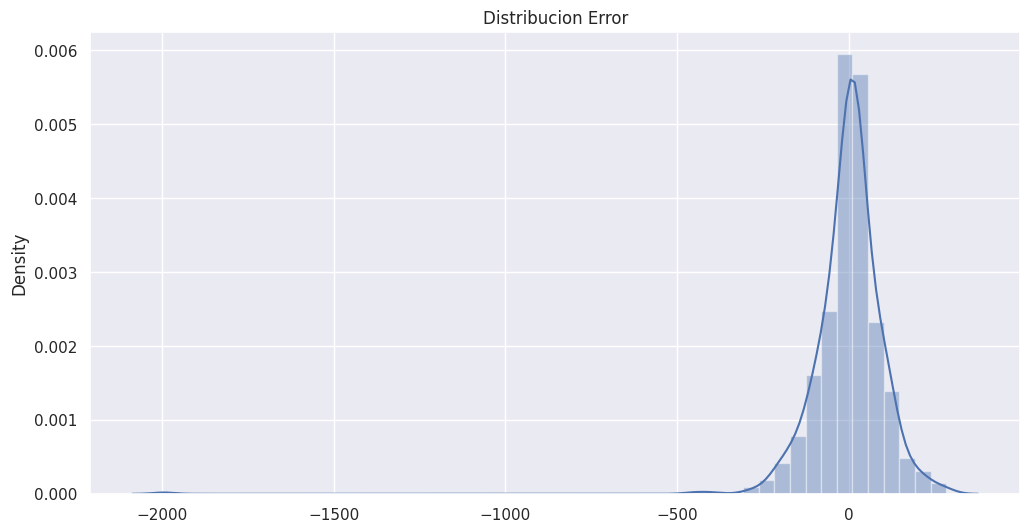

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(error).set_title('Distribucion Error')
plt.show()

In [ ]:
round(pd.Series(error).describe(),2)

count     726.00
mean        0.43
std       114.79
min     -1993.98
25%       -35.91
50%         7.87
75%        48.79
max       284.45
dtype: float64

In [ ]:
confidence=95
z = (100-confidence)/2
print("Intervalo del error (confianza",confidence,"%):",round(np.percentile(error, 100-z),1),"/",round(np.percentile(error, z),1))

Intervalo del error (confianza 95 %): 172.3 / -192.7


In [ ]:
model.predict(x_pred)

NameError: ignored

In [ ]:
!pip install -q gitpython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
!ssh-keygen -t rsa -b 4096 -C "jaumeborrero18@gmail.com"


Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): ^C


In [ ]:
!eval "$(ssh-agent -s)"
!ssh-add /root/.ssh/id_rsa


Agent pid 4094
Could not open a connection to your authentication agent.


In [ ]:
#AHORA TE QUEDA SIMPLEMENTE QUITAR LAS COLUMNAS REPETIDAS Y REPASAR EL CLASE2 DE PREPOSESAMIENTO SOLUCION, NOS HEMOS QUEDADO EN EL PUNTO 7, SI QUIERE PUEDES HACER ALGUNOS GRÁFICOS PARA JUGAR.